## Name: Harsh Chaudhari

## Implementing Feedforward neural networks with Keras and TensorFlowfor classification of hand-written MNIST dataset using below steps:
    a.Import the necessary packages
    b.Load the training and testing data
    c.Define the network architecture using Keras
    d.Train the model using SGDwith 11 epochs
    e.Evaluate the network
    f.Plot the training loss and accuracy 

In [3]:
import tensorflow.keras as keras
import pandas as pd
# from tensorflow.keras.datasets import mnist

In [5]:
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [9]:
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

In [13]:
X_test = test_data.drop('label',axis=1).values
y_test = test_data['label'].values

In [19]:
# (X_train,y_train),(X_test,y_test) = mnist.load_data()

In [14]:
X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [16]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [17]:
model = Sequential([
    Dense(512,activation='relu',input_shape=(28*28,)),
    Dense(256,activation='relu'),
    Dense(10,activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='sgd',metrics=['accuracy'],loss=SparseCategoricalCrossentropy())

In [19]:
epochs = 11
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5432 - accuracy: 0.8634 - val_loss: 0.2897 - val_accuracy: 0.9185
Epoch 2/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2694 - accuracy: 0.9229 - val_loss: 0.2374 - val_accuracy: 0.9307
Epoch 3/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2181 - accuracy: 0.9381 - val_loss: 0.1942 - val_accuracy: 0.9442
Epoch 4/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1847 - accuracy: 0.9477 - val_loss: 0.1700 - val_accuracy: 0.9515
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1604 - accuracy: 0.9544 - val_loss: 0.1508 - val_accuracy: 0.9575
Epoch 6/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1410 - accuracy: 0.9600 - val_loss: 0.1392 - val_accuracy: 0.9590
Epoch 7/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1260 - accuracy: 0.9652 - val_loss: 0.1283 - val_accuracy:

In [20]:
from sklearn.metrics import classification_report
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.94      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



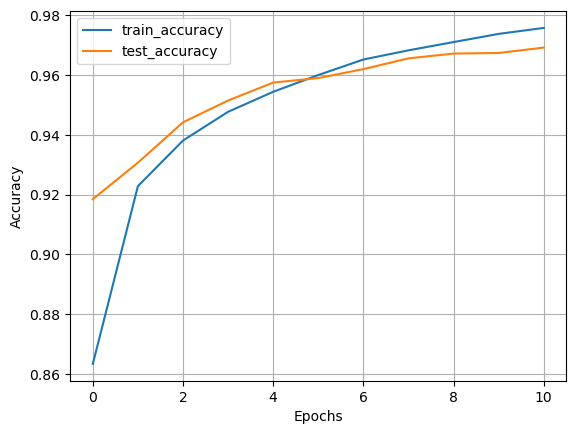

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

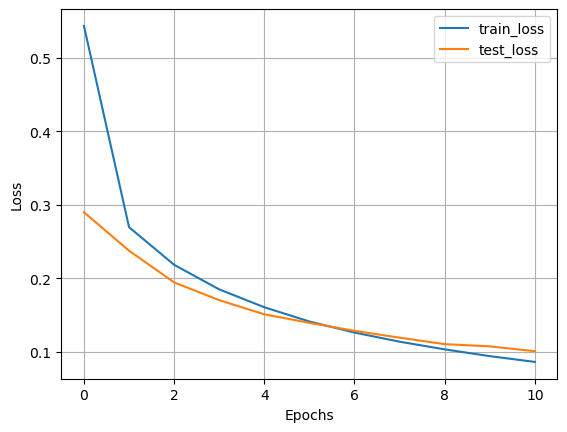

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();

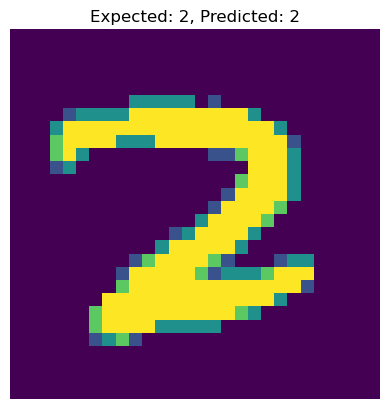

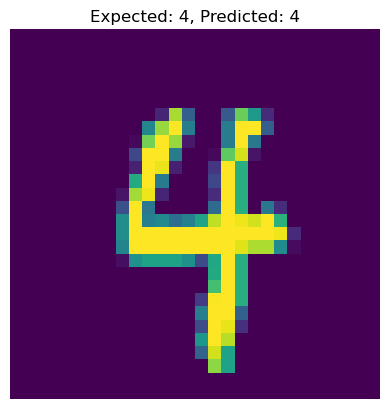

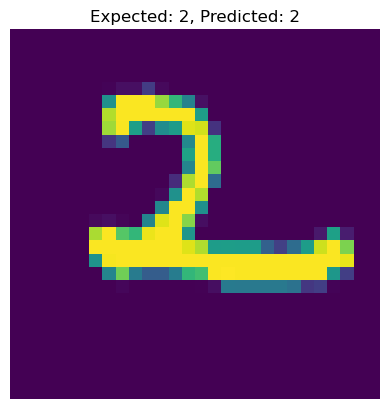

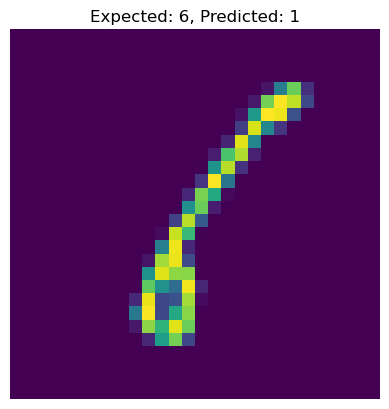

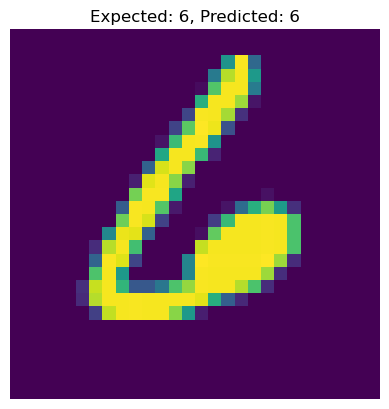

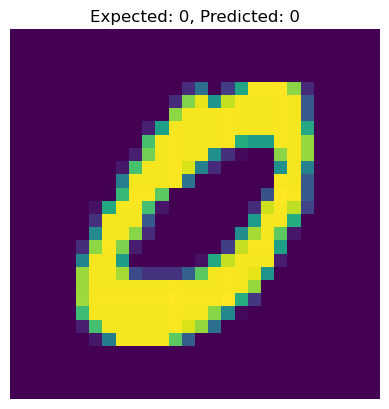

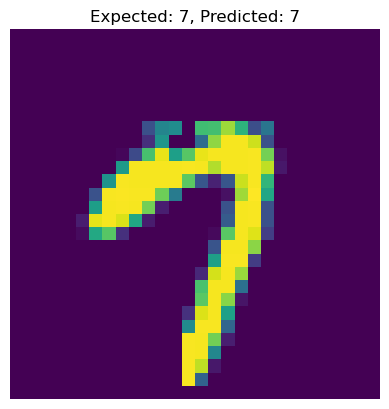

In [23]:
import numpy as np
n = 7
indices = np.random.choice(len(X_test), n)
for i, idx in enumerate(indices):
    expected_label = y_test[idx]
    predicted_label = np.argmax(predition[idx])

    # Display the image with labels
    plt.imshow(X_test[idx].reshape(28,28))
    plt.title(f'Expected: {expected_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()